# MULTIDIM PDF

In [4]:
from matplotlib import cm
from mylib.basics import sturges
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt

N = 10000
X = np.random.normal(loc=30,scale=112,size=N)
Y = np.random.normal(loc=12,scale=32,size=N)


def rotate(x: np.ndarray,y: np.ndarray,t: np.float64):
    return x*np.cos(t) - y*np.sin(t), x*np.sin(t) + y*np.cos(t)

x,y = rotate(X,Y,np.pi/4)

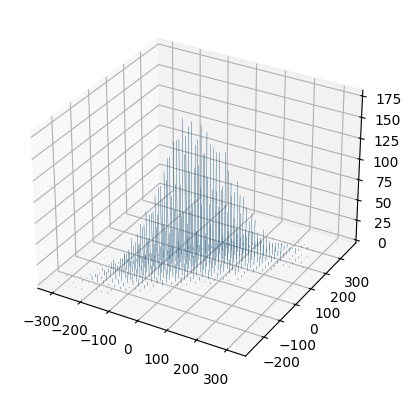

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y,bins=sturges(N))

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

surf = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## CONTINOUS REPPRESENTATION

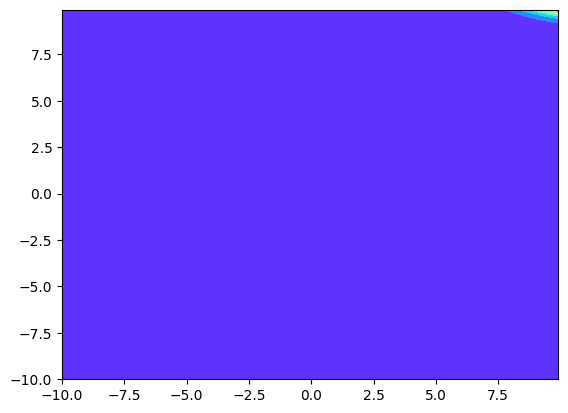

In [6]:
from scipy.stats import multivariate_normal
x,y = np.mgrid[-10:10:.1,-10:10:.1]
means = [13,32]
covm = [[3,0.5],[0.5,8]]
rv = multivariate_normal(means,covm)
data = np.dstack((x,y))
z = rv.pdf(data)
plt.contourf(x, y ,z, cmap='rainbow')
plt.show()

another random data generation

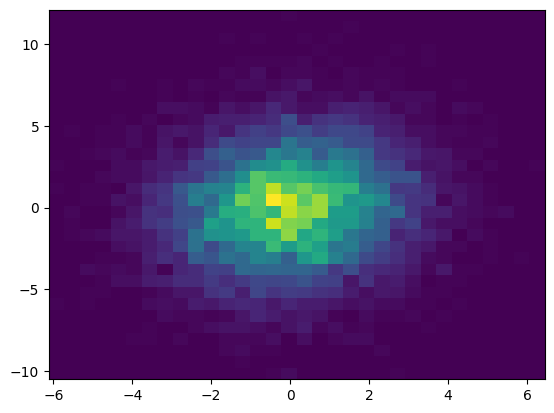

In [7]:
means = [0,0]
covm = [[3,0.5],[0.5,8]]
x, y = np.random.multivariate_normal(means, covm, N).T

hist, xedges, yedges = np.histogram2d(x, y,bins=sturges(N))
X, Y = np.meshgrid(xedges,yedges)
plt.pcolormesh(X, Y, hist.T)
plt.show()

Mean:  [0.010758727048440627, -0.022307787777840107]
Cov:
 [[2.88267421e+00 1.98971863e-17]
 [1.98971863e-17 8.15201940e+00]]


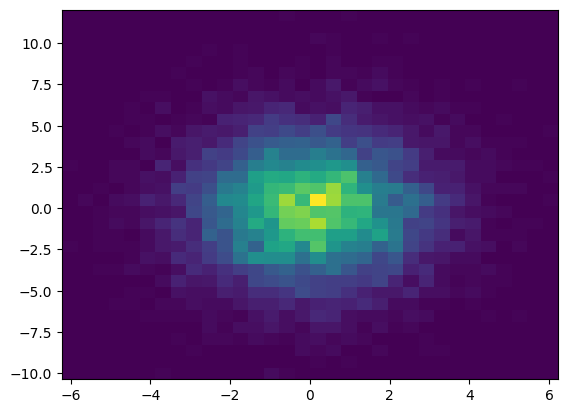

In [8]:
cov = np.cov((x,y))
mean = [x.mean(),y.mean()]

x = x - x.mean() # TRANSL
y = y - y.mean()

from scipy.linalg import eigh
eigvals, eigvecs = eigh(cov, eigvals_only=False)

M = eigvecs.T # Rotational matrix

old = np.vstack([x,y])
newx,newy = M.dot(old)

# TRANSL back
newx += mean[0]
newy += mean[1]

print('Mean: ',[newx.mean(),newy.mean()])
print('Cov:\n', np.cov((newx,newy)))
hist, xedges, yedges = np.histogram2d(newx, newy,bins=sturges(N))
X, Y = np.meshgrid(xedges,yedges)
plt.pcolormesh(X, Y, hist.T)
plt.show()


# Neymann - Pearson


In [21]:
from scipy.stats import norm
import numpy as np


norm1 = norm(loc=1,scale=3)
norm2 = norm(loc=6,scale=1)

# X = np.linspace(-4,20,1000)
# plt.plot(X,norm1.pdf(X))
# plt.plot(X,norm2.pdf(X))
# plt.show()

data1 = np.random.normal(loc=1,scale=3)
data2 = np.random.normal(loc=6,scale=1)

from mylib.parameters_estimator import likelyhood as L
print(L(norm.pdf,data1,[1,3])/L(norm.pdf,data1,[6,1]))
print(L(norm.pdf,data2,[1,3])/L(norm.pdf,data2,[6,1]))


0.2923218832924236
0.0063335812532524785
